In [ ]:
pip install opendatasets

In [ ]:
pip install pandas

In [ ]:
pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import joblib

In [ ]:
from tensorflow.keras.layers import Lambda, Dropout, Flatten, Dense, GlobalAveragePooling2D, Average, Input, Concatenate, GlobalMaxPooling2D,BatchNormalization
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import plot_model
import pandas as pd
import seaborn as sn
import tensorflow as tf
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/shimulmbstu/fruitsdataset")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tasaufmim
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/shimulmbstu/fruitsdataset


100%|██████████| 300M/300M [00:06<00:00, 51.2MB/s]


In [ ]:
IMAGE_SIZE= 224
input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)
inputs = Input(shape = input_shape)

train_path = '/content/fruitsdataset/8  Types of Fruits Dataset/Train/Train'
valid_path = '/content/fruitsdataset/8  Types of Fruits Dataset/Validation/Validation'
test_path = '/content/fruitsdataset/8  Types of Fruits Dataset/Test/Test'

In [ ]:
vgg = VGG16(input_shape=input_shape, weights='imagenet', include_top=False)(inputs)
mobile = MobileNet(input_shape=input_shape, weights='imagenet', include_top=False)(inputs)

17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
folders = glob('/content/fruitsdataset/8  Types of Fruits Dataset/Train/Train/*')

In [ ]:
x = Concatenate(axis=-1)([GlobalAveragePooling2D()(vgg), GlobalAveragePooling2D()(mobile)])
x = Dropout(0.4)(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = BatchNormalization()(x)
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs = inputs, outputs = prediction)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, 7, 7, 512)            1471468   ['input_1[0][0]']             
                                                          8                                       
                                                                                                  
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)           3228864   ['input_1[0][0]']             
 onal)                                                                                            
                                                                                              

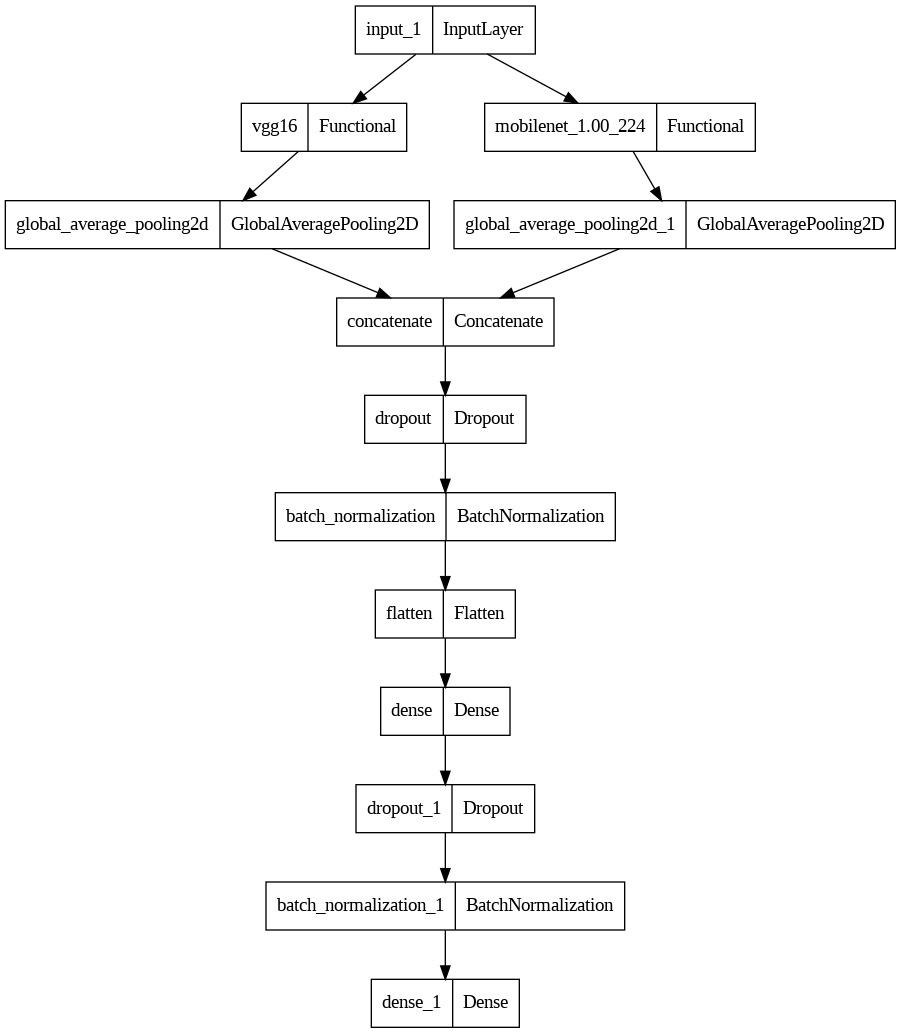

In [ ]:
model.summary()
plot_model(model)

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
train_dataset = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_dataset = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_dataset = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_dataset.flow_from_directory('/content/fruitsdataset/8  Types of Fruits Dataset/Train/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_set = valid_dataset.flow_from_directory('/content/fruitsdataset/8  Types of Fruits Dataset/Validation/Validation',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_dataset.flow_from_directory('/content/fruitsdataset/8  Types of Fruits Dataset/Test/Test',
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'categorical')

Found 1960 images belonging to 8 classes.
Found 640 images belonging to 8 classes.
Found 640 images belonging to 8 classes.


In [ ]:
NUMBER_OF_EPOCHS = 25

r = model.fit(
  training_set,
  validation_data = validation_set,
  epochs = NUMBER_OF_EPOCHS,
  steps_per_epoch = len(training_set),
  validation_steps = len(validation_set)
)

Epoch 1/25
62/62 [==============================] - 101s 937ms/step - loss: 0.4924 - accuracy: 0.8571 - val_loss: 3.9574 - val_accuracy: 0.5688
Epoch 2/25
62/62 [==============================] - 51s 825ms/step - loss: 0.2520 - accuracy: 0.9388 - val_loss: 6.4735 - val_accuracy: 0.4047
Epoch 3/25
62/62 [==============================] - 51s 828ms/step - loss: 0.2040 - accuracy: 0.9531 - val_loss: 2.8175 - val_accuracy: 0.6859
Epoch 4/25
62/62 [==============================] - 52s 835ms/step - loss: 0.1706 - accuracy: 0.9536 - val_loss: 0.6879 - val_accuracy: 0.8641
Epoch 5/25
62/62 [==============================] - 53s 849ms/step - loss: 0.1268 - accuracy: 0.9622 - val_loss: 0.3113 - val_accuracy: 0.9344
Epoch 6/25
62/62 [==============================] - 52s 832ms/step - loss: 0.0839 - accuracy: 0.9755 - val_loss: 0.1607 - val_accuracy: 0.9531
Epoch 7/25
62/62 [==============================] - 52s 840ms/step - loss: 0.1027 - accuracy: 0.9745 - val_loss: 0.1494 - val_accuracy: 0.973

In [ ]:
model.save('model_FruitMultiNet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
test_loss,test_acc = model.evaluate(test_set, verbose=2)
print('\nTest accuracy:', test_acc)

640/640 - 9s - loss: 0.0014 - accuracy: 0.9984 - 9s/epoch - 14ms/step

Test accuracy: 0.9984375238418579


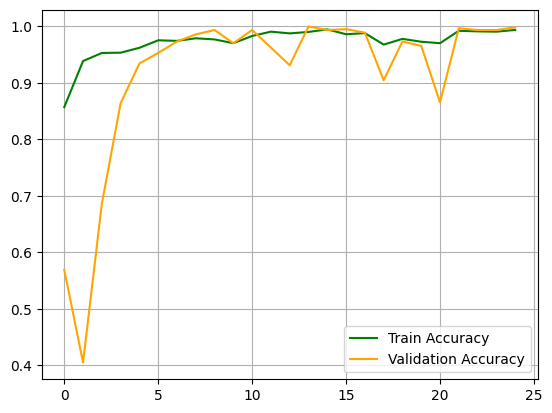

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='Train Accuracy', color='green')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy', color= 'orange')
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

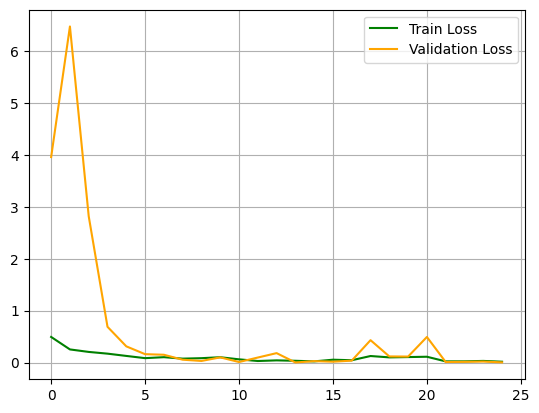

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='Train Loss', color='green')
plt.plot(r.history['val_loss'], label='Validation Loss', color='orange')
plt.grid(True)
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [ ]:
nb_samples = len(test_set)
print(nb_samples)

640


In [ ]:
model = tf.keras.models.load_model("model_FruitMultiNet.h5")
filenames = test_set.filenames
y_prob=[]
y_act=[]
test_set.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_set.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(training_set.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(training_set.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

1/1 [==============================] - 0s 20ms/step


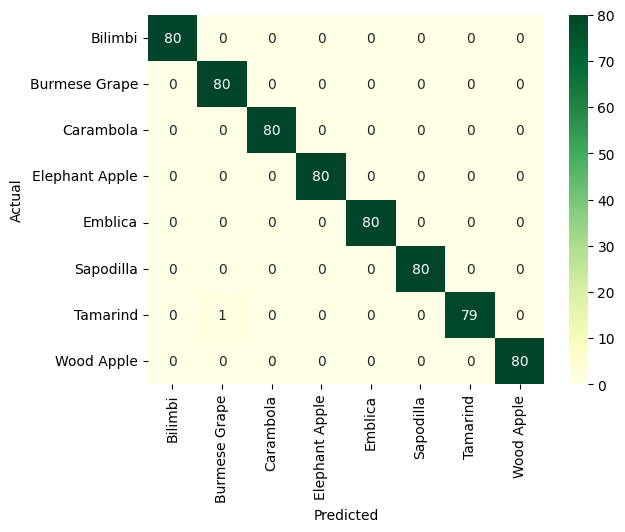

test accuracy : 99.84375


In [ ]:
sn.heatmap(confusion_matrix,cmap='YlGn', annot=True,fmt='d')
plt.show()
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))